In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [60]:
df1 = pd.read_csv("./dataset/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [61]:
df1.shape

(13320, 9)

In [62]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [63]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [64]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [65]:

median_bath = df2['bath'].median()
df2['bath'] = df2['bath'].fillna(median_bath)


In [66]:
df3=df2.dropna()
df3.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [67]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [68]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [69]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Shorya Kshettry\AppData\Local\Temp\ipykernel_27084\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [70]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [71]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [72]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [73]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [74]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return

In [75]:
df4=df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [76]:
df5=df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [77]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [78]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

location_stats

location
Whitefield                            540
Sarjapur  Road                        397
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [79]:
if len(location_stats[location_stats<=10]):
  location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [80]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [81]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [82]:
df5['price_per_room']=df5['price_per_sqft']/df5['bhk']
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_room
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,1849.905303
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,1153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,1435.185185
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,2081.963620
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,2125.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926,1337.966985
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111,2777.777778
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136,2629.272568
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319,2601.834080


(0.0, 9000.0)

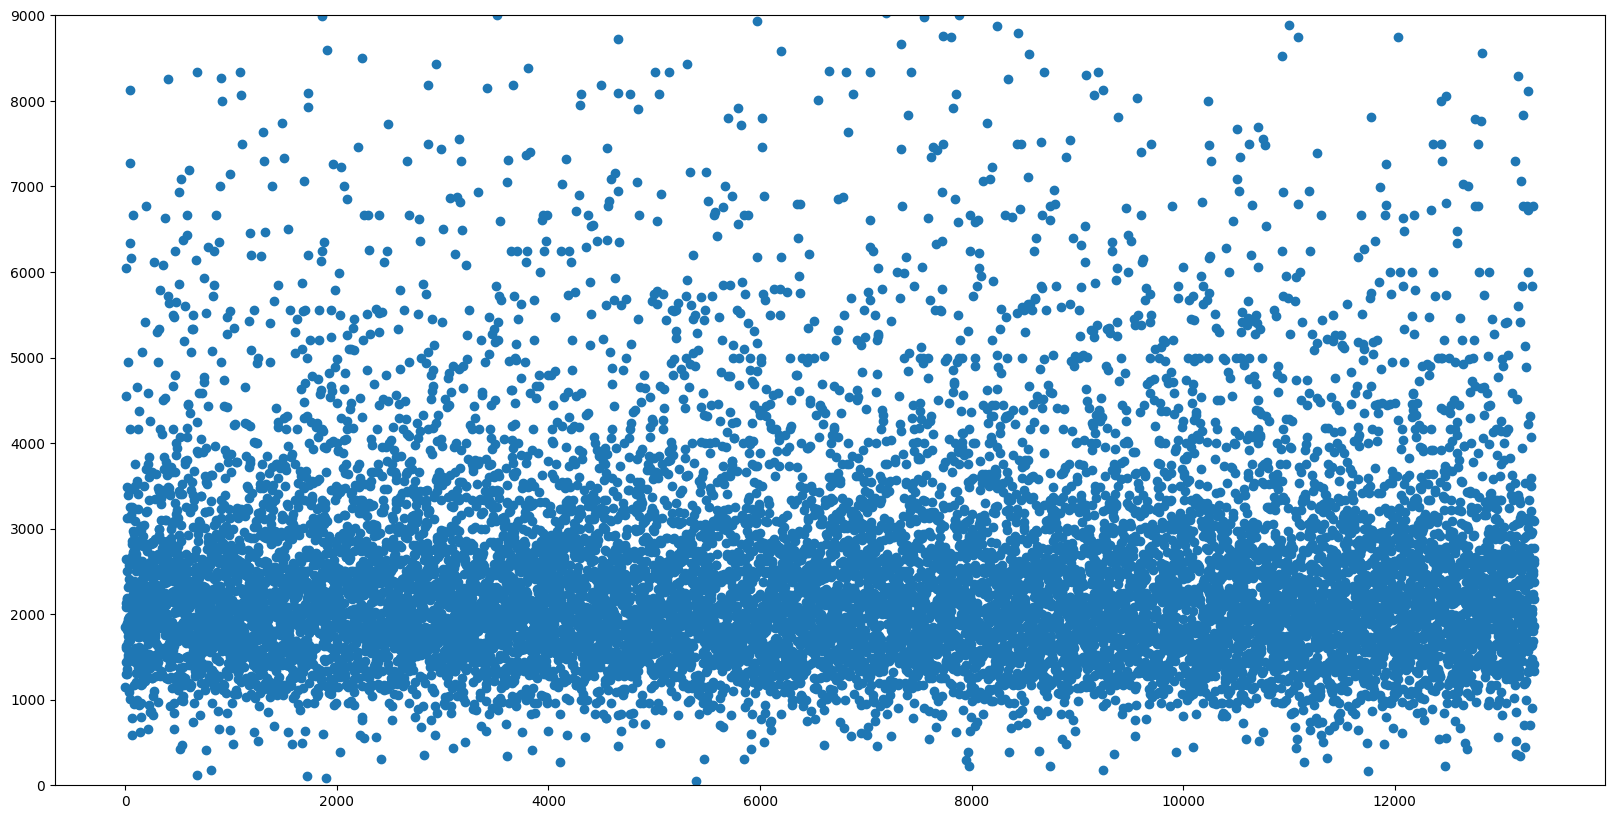

In [83]:
X=df5.index
df5.reset_index()
plt.scatter(X,df5['price_per_room'])
plt.ylim(0,9000)

In [84]:
df5=df5.sort_values('price_per_room',ascending=False)
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_room
4086,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,1.200000e+07,3.000000e+06
4972,other,7 BHK,5.0,7.0,115.0,7,2.300000e+06,3.285714e+05
349,other,3 Bedroom,11.0,3.0,74.0,3,6.727273e+05,2.242424e+05
1020,other,1 BHK,15.0,1.0,30.0,1,2.000000e+05,2.000000e+05
7657,other,1 BHK,425.0,1.0,750.0,1,1.764706e+05,1.764706e+05
...,...,...,...,...,...,...,...,...
11615,other,3 Bedroom,NaN,2.0,80.0,3,NaN,NaN
12186,7th Phase JP Nagar,2 BHK,NaN,2.0,51.0,2,NaN,NaN
12252,other,5 BHK,NaN,5.0,75.0,5,NaN,NaN
12560,Hosa Road,3 BHK,NaN,3.0,110.0,3,NaN,NaN


In [85]:
df5.drop(df5[df5['price_per_room']>20000].index,inplace=True)
df5.drop(df5[df5['price_per_room']<300].index,inplace=True)

In [86]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_room
9512,other,1 Bedroom,1500.0,1.0,300.0,1,20000.000000,20000.000000
3651,Nagarbhavi,1 Bedroom,900.0,1.0,175.0,1,19444.444444,19444.444444
6421,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530.612245,19132.653061
11861,other,1 Bedroom,400.0,1.0,75.0,1,18750.000000,18750.000000
7122,other,1 Bedroom,840.0,1.0,150.0,1,17857.142857,17857.142857
...,...,...,...,...,...,...,...,...
11615,other,3 Bedroom,NaN,2.0,80.0,3,NaN,NaN
12186,7th Phase JP Nagar,2 BHK,NaN,2.0,51.0,2,NaN,NaN
12252,other,5 BHK,NaN,5.0,75.0,5,NaN,NaN
12560,Hosa Road,3 BHK,NaN,3.0,110.0,3,NaN,NaN


In [87]:
df5.price_per_room.describe()

count    13228.000000
mean      2539.365833
std       1453.719564
min        307.328605
25%       1704.514808
50%       2198.952242
75%       2891.502501
max      20000.000000
Name: price_per_room, dtype: float64

In [88]:
df6=df5.copy()

In [89]:
df6.price_per_sqft.describe()

count    13228.000000
mean      6670.501817
std       4237.811368
min        573.921028
25%       4272.031039
50%       5437.934687
75%       7306.174976
max      76530.612245
Name: price_per_sqft, dtype: float64

In [90]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df7 = remove_pps_outliers(df6)
df7.shape


(10862, 8)

In [91]:
df6.groupby('total_sqft')['total_sqft'].agg('count')

total_sqft
250.0      1
276.0      1
284.0      1
296.0      1
300.0      1
          ..
14000.0    1
26136.0    1
30000.0    1
30400.0    1
36000.0    1
Name: total_sqft, Length: 1983, dtype: int64

In [92]:
df6[df6.total_sqft<500]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_room
11861,other,1 Bedroom,400.0,1.0,75.0,1,18750.000000,18750.000000
13216,other,1 BHK,250.0,2.0,40.0,1,16000.000000,16000.000000
7075,Yeshwanthpur,1 Bedroom,400.0,1.0,55.0,1,13750.000000,13750.000000
6716,other,1 BHK,450.0,1.0,60.0,1,13333.333333,13333.333333
10043,other,1 Bedroom,400.0,2.0,50.0,1,12500.000000,12500.000000
...,...,...,...,...,...,...,...,...
12666,Marsur,2 BHK,497.0,1.0,20.0,2,4024.144869,2012.072435
9747,Marsur,2 BHK,497.0,1.0,20.0,2,4024.144869,2012.072435
8594,Chandapura,1 BHK,450.0,1.0,9.0,1,2000.000000,2000.000000
6140,Marsur,2 BHK,497.0,1.0,17.0,2,3420.523139,1710.261569


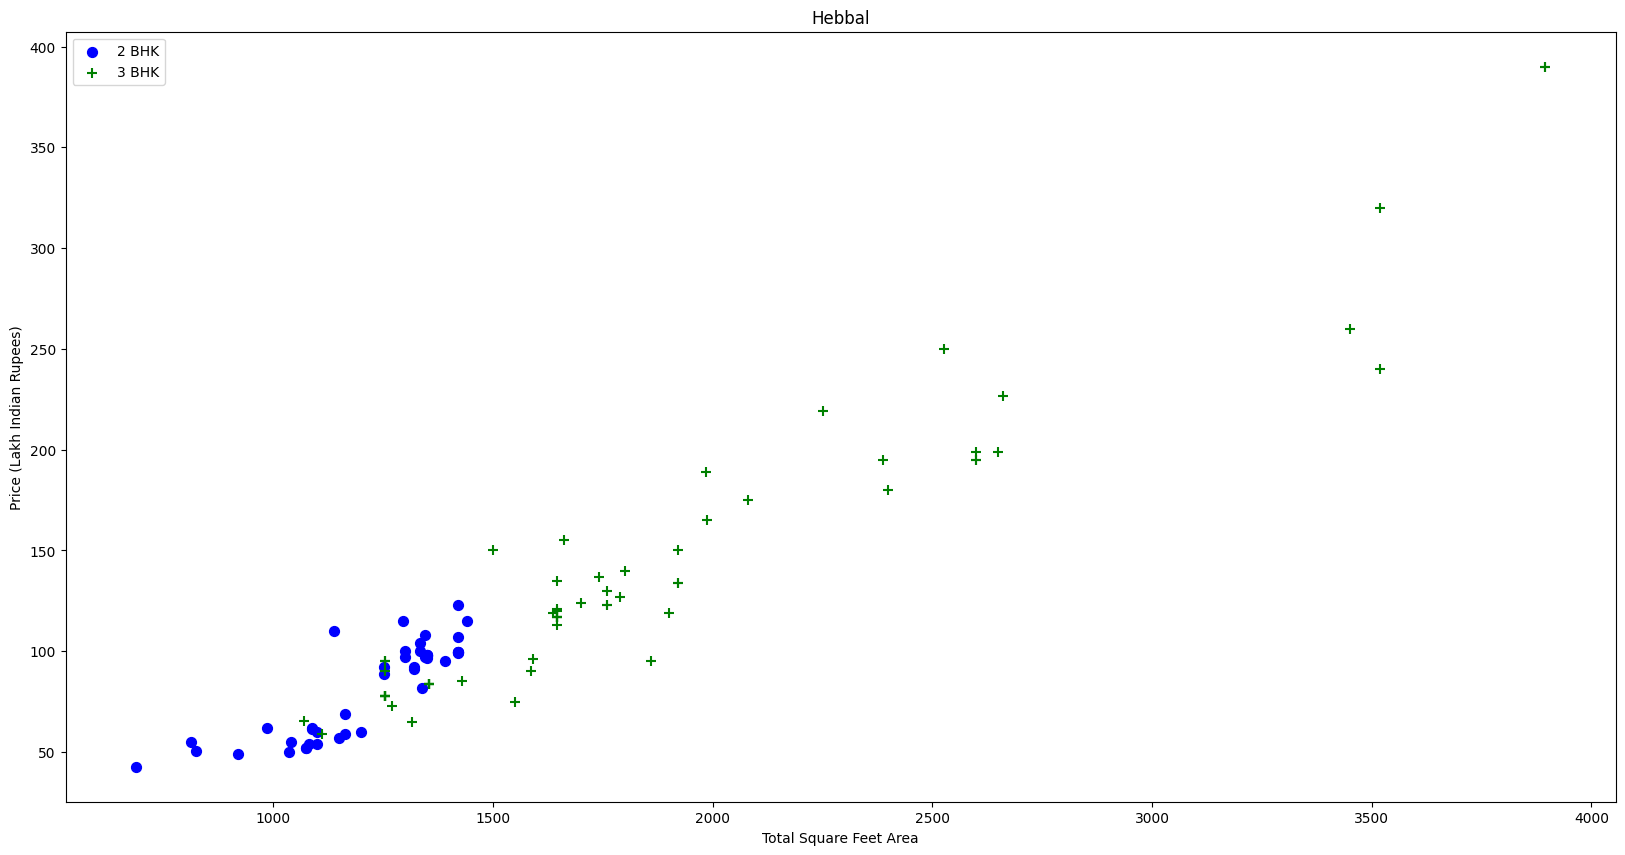

In [93]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]

    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Hebbal")

In [94]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7730, 8)

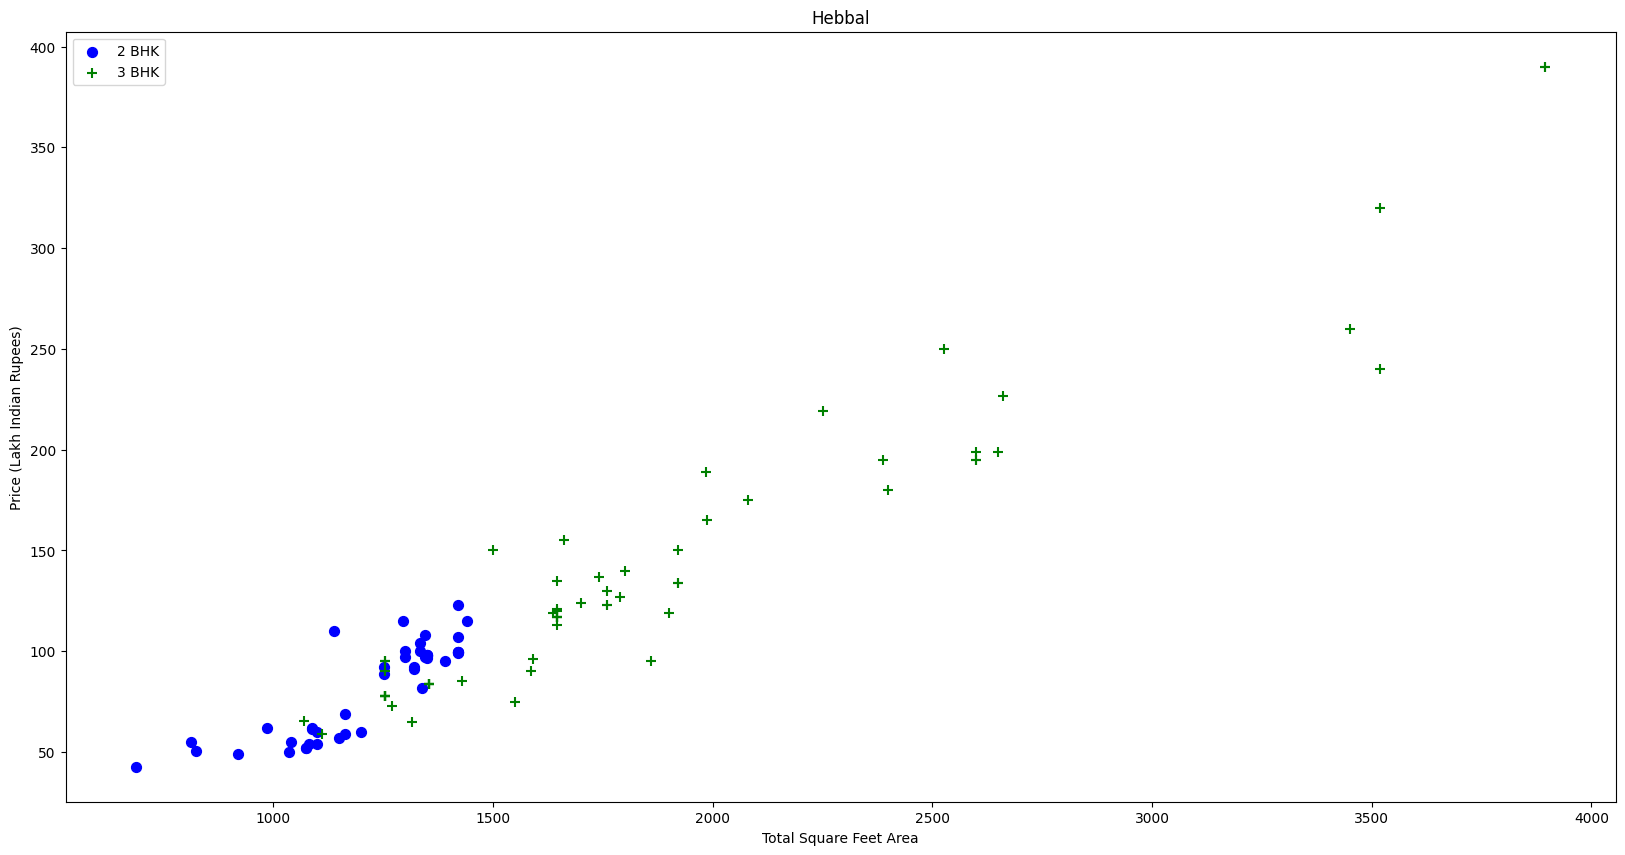

In [95]:
plot_scatter_chart(df7,"Hebbal")

In [96]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7645, 8)

In [97]:
df10 =df9.drop(['size','price_per_sqft','price_per_room'],axis="columns")
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1235.0,2.0,148.0,2
1,1st Block Jayanagar,1875.0,2.0,235.0,3
2,1st Block Jayanagar,1630.0,3.0,194.0,3
3,1st Block Jayanagar,2450.0,4.0,368.0,4
4,1st Block Jayanagar,2750.0,4.0,413.0,4
...,...,...,...,...,...
10807,other,2600.0,8.0,180.0,8
10824,other,1250.0,15.0,125.0,14
10830,other,5000.0,9.0,360.0,11
10858,other,5425.0,13.0,275.0,13


In [98]:
dummies=pd.get_dummies(df10.location,dtype=int)
dummies


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [99]:
df11=pd.concat([df10,dummies],axis="columns")
df11.drop(columns=["location","other"],inplace=True)
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,2600.0,8.0,180.0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10824,1250.0,15.0,125.0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10830,5000.0,9.0,360.0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10858,5425.0,13.0,275.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df12=df11.copy()
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,2600.0,8.0,180.0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10824,1250.0,15.0,125.0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10830,5000.0,9.0,360.0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10858,5425.0,13.0,275.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df12.shape

(7645, 245)

In [102]:
X=df12.drop(columns=["price"])
y=df12["price"]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [104]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8722060185310002

In [105]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81755302, 0.85974788, 0.84555271, 0.85513084, 0.84796313])

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {


            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return scores

In [107]:
find_best_model_using_gridsearchcv(X,y)

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_pa

[{'model': 'linear_regression',
  'best_score': np.float64(0.8451895166575479),
  'best_params': {}},
 {'model': 'lasso',
  'best_score': np.float64(0.7184892178710948),
  'best_params': {'alpha': 1, 'selection': 'random'}},
 {'model': 'decision_tree',
  'best_score': np.float64(0.8002397355585344),
  'best_params': {'criterion': 'friedman_mse', 'splitter': 'best'}}]

In [108]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [109]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_clf,f)

In [110]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))